In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Perfect sensor
def sense(x): #sensor function
    return x #assume no sensor error

In [3]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    ux = cos(t) # linear control policy for x coordinate
    uy = sin(t) # linear control policy for y coordinate
    return array([ux, uy]) #create a 2D array for the x and y coordinates

In [4]:
#simulation
def simulate(Δt, x, u):
    x += Δt * u # Euler integration
    return x

In [5]:
tf = (np.pi)*2 # end time
Δt = 0.1    # Time step
time = linspace(0., tf, int(tf / Δt) + 1) # collection of points generated at time intervals 

x = array([2., 1.]) # create an array of initial conditions 
x_log = [copy(x)] # shallow copy of array 

for t in time: # for loop of the time intervals at which position is being evaluated
    y = sense(x) # sensor input
    u = control(t, y) # control policy using sensor input and time 
    x = simulate(Δt, x, u) # simulation to change distance using control policy, time interval, 
    x_log.append(copy(x)) # make a copy the new location to the and add it on to the shallow copy of the array
    
x_log = array(x_log) # update the array

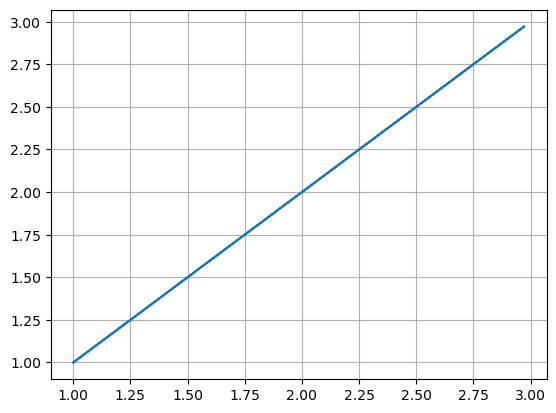

In [12]:
grid() # positioning of where plot is (there is only one so it doesn't matter)
plot(x_log[:,1], x_log[:,1]) 

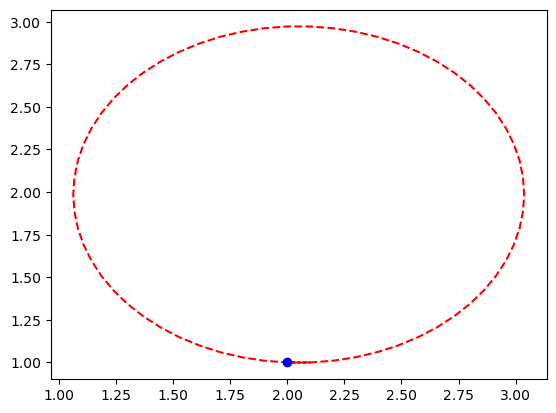

In [7]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())